In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f = open('inputs/day06.txt')
data = f.read()

In [3]:
class Grid:
    def __init__(self, input):
        self.input = input
        self.coords = self.parse_input(input.split('\n'))
        self.areas = dict.fromkeys(self.coords, 0)
        self.grid0 = self.create_grid(self.coords)
        self.grid1 = self.create_grid(self.coords)
        self.grid2 = self.create_grid(self.coords)
        
    def parse_input(self, input):
        return [tuple([int(d) for d in line.split(',')]) for line in input]
    
    def create_grid(self, coords):
        coords_df = pd.DataFrame(coords, columns=['X', 'Y'])
        grid = pd.DataFrame(np.zeros((max(coords_df.Y)+1, max(coords_df.X)+1)))
        for i, c in enumerate(coords):
            grid.loc[c[1], c[0]] = i+1
        return grid
    
    def manhattan_dist(self, c1, c2):
        return abs(c1[0] - c2[0]) + abs(c1[1] - c2[1])
    
    def closest_coord(self, coord):
        dists = []
        min_dist = np.inf
        min_coord = None
        for c in self.coords:
            dist = self.manhattan_dist(c, coord)
            dists.append(dist)
            if dist < min_dist:
                min_dist = dist
                min_coord = c
        dists = pd.Series(dists)
        min_dist = dists.min()
        if (dists == min_dist).sum() == 1:
            return min_coord
        else:
            return None
        
    def map_areas(self):
        s = self.grid1.shape
        for j in range(s[0]):
            for i in range(s[1]):
                closest_coord = self.closest_coord((i,j))
                if closest_coord is not None:
                    val = self.coords.index(closest_coord)
                    self.grid1.loc[j,i] = val + 1
                    self.areas[closest_coord] += 1
                    
    def check_boundaries(self):
        self.is_infinite = dict.fromkeys(self.coords, False)
        s = self.grid1.shape
        # check left/right
        for j in range(s[0]):
            left = int(self.grid1.loc[j, 0])
            if left > 0:
                self.is_infinite[self.coords[left-1]] = True
            right = int(self.grid1.loc[j, s[1]-1])
            if right > 0:
                self.is_infinite[self.coords[right-1]] = True
        # check top/bottom
        for i in range(s[1]):
            top = int(self.grid1.loc[0, i])
            if top > 0:
                self.is_infinite[self.coords[top-1]] = True
            btm = int(self.grid1.loc[s[0]-1, i])
            if btm > 0:
                self.is_infinite[self.coords[right-1]] = True
    
    def sum_dist_to_all_points(self, coord):
        return sum([self.manhattan_dist(c, coord) for c in self.coords])
    
    def map_sum_dists(self):
        s = self.grid2.shape
        for j in range(s[0]):
            for i in range(s[1]):
                self.grid2.loc[j,i] = self.sum_dist_to_all_points((j,i))

# Part 1

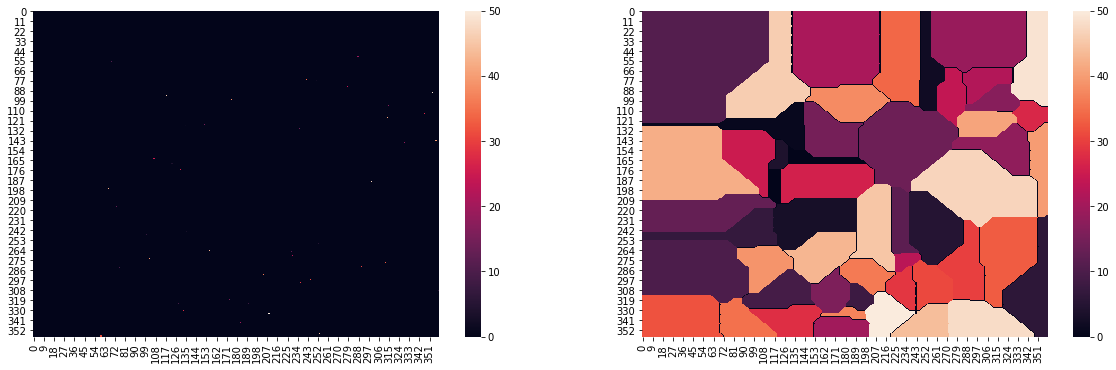

In [4]:
g = Grid(data)

fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.heatmap(g.grid0, ax=axes[0])
g.map_areas()
g.check_boundaries()
sns.heatmap(g.grid1, ax=axes[1])

In [5]:
pd.Series(list(g.areas.values()))[~pd.Series(list(g.is_infinite.values()))].max()

5975

# Part 2

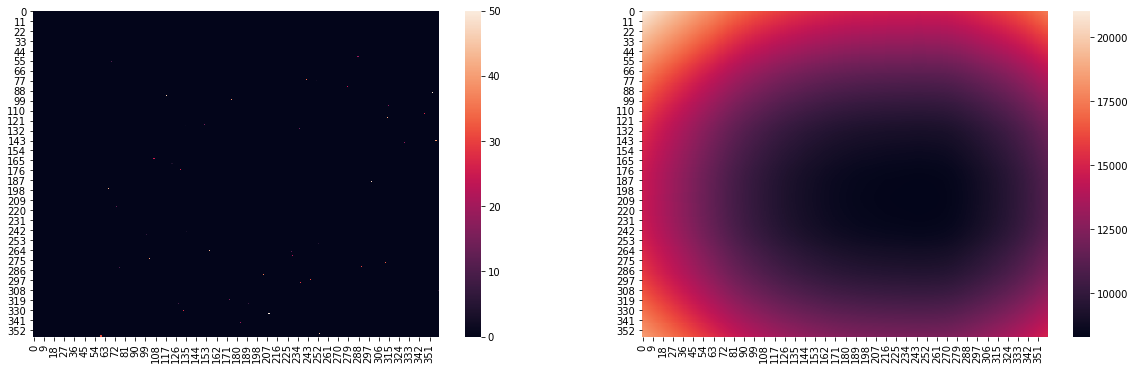

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.heatmap(g.grid0, ax=axes[0])
g.map_sum_dists()
sns.heatmap(g.grid2, ax=axes[1])

In [7]:
sum((g.grid2 < 10000).sum())

38670